# Replicability of functional connectivity-based multivariate BWAS - figures

## Plots from this notebook are saved into the directory `fig` and aggregated into two main figures:
- `fig/cv_vs_overfit.[svg|pdf|png]`
- `fig/replication_probability.[svg|pdf|png]`

### Imports

In [4]:
import math
import numpy as np
from scipy import stats
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(rc={"figure.figsize":(3, 3)})
sns.set_style("white")

# Define Plotting function
This function takes a dataframe created in the notebook `multivariate_BWAS_replicability_analysis.ipynb`
and recreates the "Replication plots" from the target paper (Fig.4) for a given target variable and feature set.

In [5]:
def plot(target, feature, df, alpha=0.05, cv_only=True, filetag=None, ylim=None, xlim=None):
    sns.set(rc={"figure.figsize":(3, 3)})
    sns.set_style("white")
    tmp = df.loc[(df.target==target) & (df.connectivity==feature)]
    if not cv_only:
        sns.scatterplot(x='r_replication', y='r_discovery_overfit', hue='n', data=tmp, palette='Greens_r', linewidth=0, hue_norm=(0,tmp.n.max()*1.5))
        sns.scatterplot(x=[tmp.loc[tmp.n==200, 'r_replication'].mean()], y=[tmp.loc[tmp.n==200, 'r_discovery_overfit'].mean()], color='red')
        sns.scatterplot(x=[tmp.loc[tmp.n==tmp.n.max(), 'r_replication'].mean()], y=[tmp.loc[tmp.n==tmp.n.max(), 'r_discovery_overfit'].mean()], color='purple').set(title='Discovery without CV (overfit)')
        plt.axhline(0, color='gray')
        plt.axvline(0, color='gray')
        plt.axvline(0.088, linestyle='dotted')
        plt.axhline(0.088, linestyle='dotted')
        plt.axvline(0.088, linestyle='dotted')
        plt.legend(bbox_to_anchor=(1.2, 1), loc=2, borderaxespad=0.)
        if ylim:
            plt.ylim(ylim)
        if xlim:
            plt.xlim(xlim)
        sns.despine()
        if filetag:
            plt.savefig('fig/overfit_scatter_' + target + '_' + feature + '_' + filetag + '.pdf')
        plt.show()

        for n in tmp.n.unique():
            tmp2 = tmp[tmp.n == n]

            if (tmp2['p_discovery_overfit']<alpha).sum() == 0:
                replication_prob = 'no discovery'
            else:
                 #      #(significant replications among significant discoveries)     / # significant discoveries
                replication_prob = (tmp2.loc[tmp2['p_discovery_overfit']<alpha,'p_replication']<alpha).sum() / (tmp2['p_discovery_overfit']<alpha).sum() * 100
                print("Replication probability at n =", n, ':', replication_prob, '%')
        
    sns.scatterplot(x='r_replication', y='r_discovery_cv', hue='n', data=tmp, palette='Greens_r', linewidth=0, hue_norm=(0,tmp.n.max()*1.5))
    sns.scatterplot(x=[tmp.loc[tmp.n==200, 'r_replication'].mean()], y=[tmp.loc[tmp.n==200, 'r_discovery_cv'].mean()], color='red')
    sns.scatterplot(x=[tmp.loc[tmp.n==tmp.n.max(), 'r_replication'].mean()], y=[tmp.loc[tmp.n==tmp.n.max(), 'r_discovery_cv'].mean()], color='purple').set(title='Discovery with CV')
    plt.axhline(0, color='gray')
    plt.axvline(0, color='gray')
    plt.axhline(0.088, linestyle='dotted')
    plt.axvline(0.088, linestyle='dotted')
    plt.legend(bbox_to_anchor=(1.2, 1), loc=2, borderaxespad=0.)
    if ylim:
        plt.ylim(ylim)
    if xlim:
        plt.xlim(xlim)
    sns.despine()
    if filetag:
        plt.savefig('fig/scatter_' + target + '_' + feature + '_' + filetag + '.pdf')
    plt.show()

    for n in tmp.n.unique():
        tmp2 = tmp[tmp.n == n]

        if (tmp2['p_discovery_cv']<alpha).sum() == 0:
            replication_prob = 'no discovery'
        else:
             #      #(significant replications among significant discoveries)     / # significant discoveries
            replication_prob = (tmp2.loc[tmp2['p_discovery_cv']<alpha,'p_replication']<alpha).sum() / (tmp2['p_discovery_cv']<alpha).sum() * 100

        print("Replication probability at n =", n, ':', replication_prob, '%')

    return {'r_rep_200': tmp.loc[tmp.n==200, 'r_replication'].mean(),
            'r_rep_max': tmp.loc[tmp.n==tmp.n.max(), 'r_replication'].mean()}


## Possible targets:
'age', 'CogTotalComp_AgeAdj', 'PMAT24_A_CR', 'Flanker_AgeAdj', 'CardSort_AgeAdj', 'PicSeq_AgeAdj'
## Possible features
'netmats_parcor', 'netmats_pearson'

# Cognitive ability, PCA+SVR, pearson correlation
This basically reproduces Fig. 4 of the target paper with a highly similar methodology.

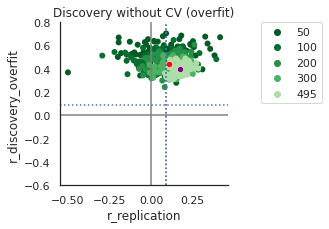

Replication probability at n = 50 : 11.0 %
Replication probability at n = 100 : 17.0 %
Replication probability at n = 200 : 43.0 %
Replication probability at n = 300 : 72.0 %
Replication probability at n = 495 : 100.0 %


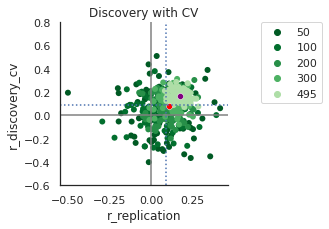

Replication probability at n = 50 : no discovery %
Replication probability at n = 100 : 0.0 %
Replication probability at n = 200 : 25.0 %
Replication probability at n = 300 : 62.16216216216216 %
Replication probability at n = 495 : 100.0 %


{'r_rep_200': 0.10612941902239685, 'r_rep_max': 0.17595802104381736}

In [6]:
df = pd.read_csv('res/results_PCA_SVR.csv')
plot(target='CogTotalComp_AgeAdj', feature='netmats_pearson', df=df, cv_only=False, filetag='PCA-SVR_ylim', ylim=(-0.6,0.8))

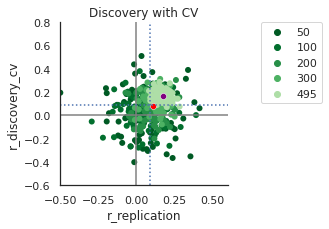

Replication probability at n = 50 : no discovery %
Replication probability at n = 100 : 0.0 %
Replication probability at n = 200 : 25.0 %
Replication probability at n = 300 : 62.16216216216216 %
Replication probability at n = 495 : 100.0 %


{'r_rep_200': 0.10612941902239685, 'r_rep_max': 0.17595802104381736}

In [7]:

plot(target='CogTotalComp_AgeAdj', feature='netmats_pearson', df=df, cv_only=True, filetag='PCA-SVR', ylim=(-0.6,0.8), xlim=(-0.5, 0.6))

# Cognitive ability, PCA+SVR, partial correlation

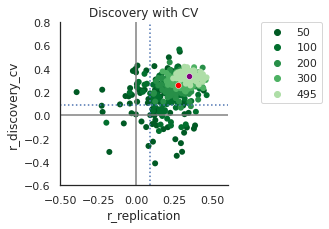

Replication probability at n = 50 : no discovery %
Replication probability at n = 100 : 90.9090909090909 %
Replication probability at n = 200 : 100.0 %
Replication probability at n = 300 : 100.0 %
Replication probability at n = 495 : 100.0 %


{'r_rep_200': 0.2713589974517626, 'r_rep_max': 0.34611199458096925}

In [8]:
df = pd.read_csv('res/results_PCA_SVR.csv')
plot(target='CogTotalComp_AgeAdj', feature='netmats_parcor', df=df, filetag='PCA-SVR', ylim=(-0.6,0.8), xlim=(-0.5, 0.6))

# Cognitive ability, Ridge, pearson correlation

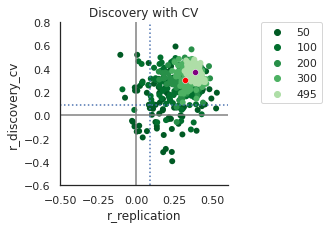

Replication probability at n = 50 : 40.625 %
Replication probability at n = 100 : 78.66666666666666 %
Replication probability at n = 200 : 100.0 %
Replication probability at n = 300 : 100.0 %
Replication probability at n = 495 : 100.0 %


{'r_rep_200': 0.31597434384989187, 'r_rep_max': 0.38191979503949747}

In [9]:
df = pd.read_csv('res/results_Ridge.csv')
plot(target='CogTotalComp_AgeAdj', feature='netmats_pearson', df=df, filetag='Ridge', ylim=(-0.6,0.8), xlim=(-0.5, 0.6))

# Cognitive ability, Ridge, partial correlation

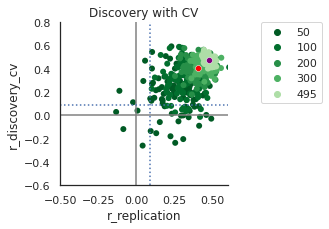

Replication probability at n = 50 : 64.86486486486487 %
Replication probability at n = 100 : 97.5 %
Replication probability at n = 200 : 100.0 %
Replication probability at n = 300 : 100.0 %
Replication probability at n = 495 : 100.0 %


{'r_rep_200': 0.4062055329971098, 'r_rep_max': 0.47903946590450225}

In [10]:
df = pd.read_csv('res/results_Ridge.csv')
plot(target='CogTotalComp_AgeAdj', feature='netmats_parcor', df=df, filetag='Ridge', ylim=(-0.6,0.8), xlim=(-0.5, 0.6))

# Inflation histograms

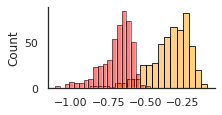

In [11]:
sns.set(rc={"figure.figsize":(3, 1.5)})
sns.set_style("white")
df = pd.read_csv('res/results_PCA_SVR.csv')
tmp = df.loc[(df.target=='CogTotalComp_AgeAdj') & (df.connectivity=='netmats_pearson')]
sns.histplot(tmp.r_replication - tmp.r_discovery_overfit, color='orange', alpha=0.5)
sns.histplot(tmp.r_replication - tmp.r_discovery_overfit, color='black',fill=False)


df = pd.read_csv('res/results_Ridge.csv')
tmp = df.loc[(df.target=='CogTotalComp_AgeAdj') & (df.connectivity=='netmats_pearson')]
sns.histplot(tmp.r_replication - tmp.r_discovery_overfit, color='red', alpha=0.5)
sns.histplot(tmp.r_replication - tmp.r_discovery_overfit, color='black',fill=False)
sns.despine()

plt.savefig('fig/hist_inflation_overfit.pdf')
plt.show()

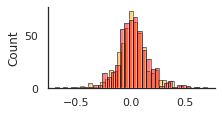

In [12]:
sns.set(rc={"figure.figsize":(3, 1.5)})
sns.set_style("white")
df = pd.read_csv('res/results_PCA_SVR.csv')
tmp = df.loc[(df.target=='CogTotalComp_AgeAdj') & (df.connectivity=='netmats_pearson')]
sns.histplot(tmp.r_replication - tmp.r_discovery_cv, color='orange', alpha=0.5)
sns.histplot(tmp.r_replication - tmp.r_discovery_cv, color='black',fill=False)


df = pd.read_csv('res/results_Ridge.csv')
tmp = df.loc[(df.target=='CogTotalComp_AgeAdj') & (df.connectivity=='netmats_pearson')]
sns.histplot(tmp.r_replication - tmp.r_discovery_cv, color='red', alpha=0.5)
sns.histplot(tmp.r_replication - tmp.r_discovery_cv, color='black',fill=False)
sns.despine()

plt.savefig('fig/hist_inflation_cv.pdf')
plt.show()

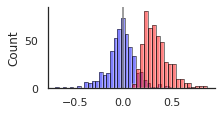

In [13]:
sns.set(rc={"figure.figsize":(3, 1.5)})
sns.set_style("white")
df = pd.read_csv('res/results_PCA_SVR.csv')
tmp = df.loc[(df.target=='CogTotalComp_AgeAdj') & (df.connectivity=='netmats_pearson')]
sns.histplot(tmp.r_discovery_cv - tmp.r_replication, color='blue', alpha=0.5)
sns.histplot(tmp.r_discovery_cv - tmp.r_replication, color='black',fill=False)

tmp = df.loc[(df.target=='CogTotalComp_AgeAdj') & (df.connectivity=='netmats_pearson')]
sns.histplot(tmp.r_discovery_overfit - tmp.r_replication, color='red', alpha=0.5)
sns.histplot(tmp.r_discovery_overfit - tmp.r_replication, color='black',fill=False)
sns.despine()

plt.axvline(0, color='gray')

plt.savefig('fig/hist_inflation_cv_vs_overfit.pdf')
plt.show()

# False positives with biased and unbiased estimates
 Evaluated via a null model

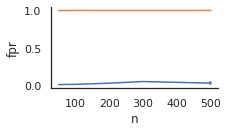

In [14]:
sns.set(rc={"figure.figsize":(3, 1.5)})
sns.set_style("white")

df = pd.read_csv('res/results_null_PCA_SVR.csv')

def fpr(x, alpha=0.05):
    return (x<alpha).sum()/len(x)

df_fpr = df.groupby('n')['p_discovery_cv'].agg([fpr])
sns.lineplot(x='n', y='fpr', data=df_fpr)
df_fpr = df.groupby('n')['p_discovery_overfit'].agg([fpr])
sns.lineplot(x='n', y='fpr', data=df_fpr)
sns.despine()

/tmp/ipykernel_22988/1750753357.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp['inflation_cv'] = tmp.r_discovery_cv - tmp.r_replication
/tmp/ipykernel_22988/1750753357.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp['inflation_overfit'] = tmp.r_discovery_overfit - tmp.r_replication


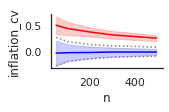

In [52]:
sns.set(rc={"figure.figsize":(2, 1)})
sns.set_style("white")

df = pd.read_csv('res/results_PCA_SVR.csv')
tmp = df[df.target == 'CogTotalComp_AgeAdj']

num_perm = 1000


# helper functions to compoute conf. intervals for correlation
def r_to_z(r):
    return math.log((1 + r) / (1 - r)) / 2.0

def z_to_r(z):
    e = math.exp(2 * z)
    return (e - 1) / (e + 1)

def r_confidence_interval(r, alpha, n):
    z = r_to_z(r)
    se = 1.0 / math.sqrt(n - 3)
    z_crit = stats.norm.ppf((1 + alpha)/2)  # 2-tailed z critical value

    lo = z - z_crit * se
    hi = z + z_crit * se
    # Return a sequence
    return (z_to_r(lo), z_to_r(hi))

r_ci_lo = [r_confidence_interval(0, 0.95, n=n)[0] for n in df.n.unique()]
r_ci_hi = [r_confidence_interval(0, 0.95, n=n)[1] for n in df.n.unique()]

tmp['inflation_cv'] = tmp.r_discovery_cv - tmp.r_replication
tmp['inflation_overfit'] = tmp.r_discovery_overfit - tmp.r_replication

sns.lineplot(x='n', y='inflation_cv', data=tmp, ci='sd', color="blue")
sns.lineplot(x='n', y='inflation_overfit', data=tmp, ci='sd', color="red")
sns.lineplot(x=df.n.unique(), y=r_ci_lo, linestyle='dotted', color='gray')
sns.lineplot(x=df.n.unique(), y=r_ci_hi, linestyle='dotted', color='gray')
sns.despine()
plt.savefig('fig/curves_biased_vs_unbiased.pdf')

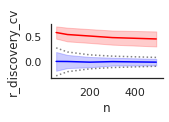

In [48]:
sns.set(rc={"figure.figsize":(2, 1)})
sns.set_style("white")

df = pd.read_csv('res/results_null_PCA_SVR.csv')
tmp = df[df.target == 'CogTotalComp_AgeAdj']

num_perm = 1000


# helper functions to compoute conf. intervals for correlation
def r_to_z(r):
    return math.log((1 + r) / (1 - r)) / 2.0

def z_to_r(z):
    e = math.exp(2 * z)
    return (e - 1) / (e + 1)

def r_confidence_interval(r, alpha, n):
    z = r_to_z(r)
    se = 1.0 / math.sqrt(n - 3)
    z_crit = stats.norm.ppf((1 + alpha)/2)  # 2-tailed z critical value

    lo = z - z_crit * se
    hi = z + z_crit * se
    # Return a sequence
    return (z_to_r(lo), z_to_r(hi))

r_ci_lo = [r_confidence_interval(0, 0.95, n=n)[0] for n in df.n.unique()]
r_ci_hi = [r_confidence_interval(0, 0.95, n=n)[1] for n in df.n.unique()]

sns.lineplot(x='n', y='r_discovery_cv', data=tmp, ci='sd', color="blue")
sns.lineplot(x='n', y='r_discovery_overfit', data=tmp, ci='sd', color="red")
sns.lineplot(x=df.n.unique(), y=r_ci_lo, linestyle='dotted', color='gray')
sns.lineplot(x=df.n.unique(), y=r_ci_hi, linestyle='dotted', color='gray')
sns.despine()
plt.savefig('fig/null_biased_vs_unbiased.pdf')

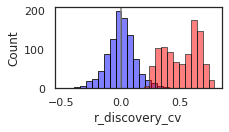

In [16]:
df = pd.read_csv('res/results_null_PCA_SVR.csv')
tmp = df[df.target == 'CogTotalComp_AgeAdj']

binwidth = 0.05

sns.histplot(tmp.r_discovery_cv, color='blue', alpha=0.5, binwidth=binwidth)
sns.histplot(tmp.r_discovery_cv, color='black',fill=False, binwidth=binwidth)

sns.histplot(tmp.r_discovery_overfit, color='red', alpha=0.5, binwidth=binwidth)
sns.histplot(tmp.r_discovery_overfit, color='black',fill=False, binwidth=binwidth)

plt.axvline(0, color='gray')

# Replication Probabilities

PCA-SVR, pearson

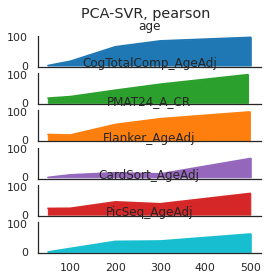

In [17]:
import numpy as np
sns.set(rc={"figure.figsize":(4, 4)})
sns.set_style("white")
# Replicability of:
feature = 'netmats_pearson'
model = "PCA_SVR"
df = pd.read_csv('res/results_' + model + '.csv')
df_null = pd.read_csv('res/results_null_' + model + '.csv')

fig, axes = plt.subplots(6, sharex=True, sharey=True)
cols = ['tab:blue', 'tab:green', 'tab:orange', 'tab:purple', 'tab:red', 'tab:cyan']
for i_target, target in enumerate(['age', 'CogTotalComp_AgeAdj', 'PMAT24_A_CR', 'Flanker_AgeAdj', 'CardSort_AgeAdj', 'PicSeq_AgeAdj']):
    tmp = df.loc[(df.target==target) & (df.connectivity==feature)]
    tmp_null = df_null.loc[(df_null.target==target) & (df_null.connectivity==feature)]

    alpha=0.05
    replication_prob = np.zeros(len(tmp.n.unique()))
    for i, n in enumerate(tmp.n.unique()):
            tmp2 = tmp[tmp.n == n]
            tmp2_null = tmp_null[tmp_null.n == n]
            r_discovery_threshold = np.quantile(tmp2_null.r_discovery_cv.dropna(), 1-alpha)

            if (tmp2['r_discovery_cv']>=r_discovery_threshold).sum() == 0:
                replication_prob[i] = np.nan
            else:
                 #      #(significant replications among significant discoveries)     / # significant replications
                replication_prob[i] = (tmp2.loc[tmp2['r_discovery_cv']>=r_discovery_threshold,'p_replication']<alpha).sum() / (tmp2['r_discovery_cv']>=r_discovery_threshold).sum() * 100
    sns.lineplot(x=tmp.n.unique(), y=replication_prob, color=cols[i_target], ax=axes[i_target]).set(title=target)
    axes[i_target].fill_between(tmp.n.unique(), replication_prob, color=cols[i_target])
    sns.despine()
    fig.suptitle('PCA-SVR, pearson')
    plt.savefig('fig/replication_' + feature + '_' + model + '.pdf')

Ridge, pearson

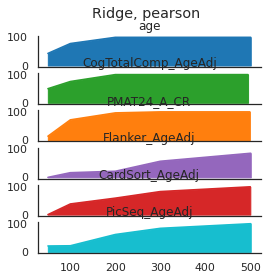

In [18]:
import numpy as np
sns.set(rc={"figure.figsize":(4, 4)})
sns.set_style("white")
# Replicability of:
feature = 'netmats_pearson'
model = "Ridge"
df = pd.read_csv('res/results_' + model + '.csv')
df_null = pd.read_csv('res/results_null_' + model + '.csv')

fig, axes = plt.subplots(6, sharex=True, sharey=True)
cols = ['tab:blue', 'tab:green', 'tab:orange', 'tab:purple', 'tab:red', 'tab:cyan']
for i_target, target in enumerate(['age', 'CogTotalComp_AgeAdj', 'PMAT24_A_CR', 'Flanker_AgeAdj', 'CardSort_AgeAdj', 'PicSeq_AgeAdj']):
    tmp = df.loc[(df.target==target) & (df.connectivity==feature)]
    tmp_null = df_null.loc[(df_null.target==target) & (df_null.connectivity==feature)]

    alpha=0.05
    replication_prob = np.zeros(len(tmp.n.unique()))
    for i, n in enumerate(tmp.n.unique()):
            tmp2 = tmp[tmp.n == n]
            tmp2_null = tmp_null[tmp_null.n == n]
            r_discovery_threshold = np.quantile(tmp2_null.r_discovery_cv.dropna(), 1-alpha)

            if (tmp2['r_discovery_cv']>=r_discovery_threshold).sum() == 0:
                replication_prob[i] = np.nan
            else:
                 #      #(significant replications among significant discoveries)     / # significant replications
                replication_prob[i] = (tmp2.loc[tmp2['r_discovery_cv']>=r_discovery_threshold,'p_replication']<alpha).sum() / (tmp2['r_discovery_cv']>=r_discovery_threshold).sum() * 100
    sns.lineplot(x=tmp.n.unique(), y=replication_prob, color=cols[i_target], ax=axes[i_target]).set(title=target)
    #fig.xlim((50,500))
    #fig.ylim((0,100))
    axes[i_target].fill_between(tmp.n.unique(), replication_prob, color=cols[i_target])
    sns.despine()
    fig.suptitle('Ridge, pearson')
    plt.savefig('fig/replication_' + feature + '_' + model + '.pdf')

PCA-SVR parcor

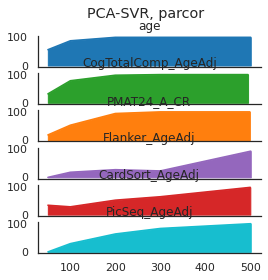

In [19]:
import numpy as np
sns.set(rc={"figure.figsize":(4, 4)})
sns.set_style("white")
# Replicability of:
feature = 'netmats_parcor'
model = "PCA_SVR"
df = pd.read_csv('res/results_' + model + '.csv')
df_null = pd.read_csv('res/results_null_' + model + '.csv')

fig, axes = plt.subplots(6, sharex=True, sharey=True)
cols = ['tab:blue', 'tab:green', 'tab:orange', 'tab:purple', 'tab:red', 'tab:cyan']
for i_target, target in enumerate(['age', 'CogTotalComp_AgeAdj', 'PMAT24_A_CR', 'Flanker_AgeAdj', 'CardSort_AgeAdj', 'PicSeq_AgeAdj']):
    tmp = df.loc[(df.target==target) & (df.connectivity==feature)]
    tmp_null = df_null.loc[(df_null.target==target) & (df_null.connectivity==feature)]

    alpha=0.05
    replication_prob = np.zeros(len(tmp.n.unique()))
    for i, n in enumerate(tmp.n.unique()):
            tmp2 = tmp[tmp.n == n]
            tmp2_null = tmp_null[tmp_null.n == n]
            r_discovery_threshold = np.quantile(tmp2_null.r_discovery_cv.dropna(), 1-alpha)

            if (tmp2['r_discovery_cv']>=r_discovery_threshold).sum() == 0:
                replication_prob[i] = np.nan
            else:
                 #      #(significant replications among significant discoveries)     / # significant replications
                replication_prob[i] = (tmp2.loc[tmp2['r_discovery_cv']>=r_discovery_threshold,'p_replication']<alpha).sum() / (tmp2['r_discovery_cv']>=r_discovery_threshold).sum() * 100
    sns.lineplot(x=tmp.n.unique(), y=replication_prob, color=cols[i_target], ax=axes[i_target]).set(title=target)
    axes[i_target].fill_between(tmp.n.unique(), replication_prob, color=cols[i_target])
    sns.despine()
    fig.suptitle('PCA-SVR, parcor')
    plt.savefig('fig/replication_' + feature + '_' + model + '.pdf')

Ridge, parcor

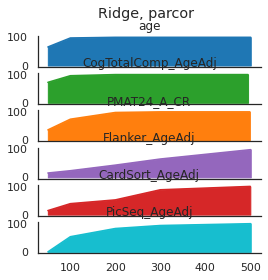

In [20]:
import numpy as np
sns.set(rc={"figure.figsize":(4, 4)})
sns.set_style("white")
# Replicability of:
feature = 'netmats_parcor'
model = "Ridge"
df = pd.read_csv('res/results_' + model + '.csv')
df_null = pd.read_csv('res/results_null_' + model + '.csv')

fig, axes = plt.subplots(6, sharex=True, sharey=True)
cols = ['tab:blue', 'tab:green', 'tab:orange', 'tab:purple', 'tab:red', 'tab:cyan']
for i_target, target in enumerate(['age', 'CogTotalComp_AgeAdj', 'PMAT24_A_CR', 'Flanker_AgeAdj', 'CardSort_AgeAdj', 'PicSeq_AgeAdj']):
    tmp = df.loc[(df.target==target) & (df.connectivity==feature)]
    tmp_null = df_null.loc[(df_null.target==target) & (df_null.connectivity==feature)]

    alpha=0.05
    replication_prob = np.zeros(len(tmp.n.unique()))
    for i, n in enumerate(tmp.n.unique()):
            tmp2 = tmp[tmp.n == n]
            tmp2_null = tmp_null[tmp_null.n == n]
            r_discovery_threshold = np.quantile(tmp2_null.r_discovery_cv.dropna(), 1-alpha)

            if (tmp2['r_discovery_cv']>=r_discovery_threshold).sum() == 0:
                replication_prob[i] = np.nan
            else:
                 #      #(significant replications among significant discoveries)     / # significant replications
                replication_prob[i] = (tmp2.loc[tmp2['r_discovery_cv']>=r_discovery_threshold,'p_replication']<alpha).sum() / (tmp2['r_discovery_cv']>=r_discovery_threshold).sum() * 100
    sns.lineplot(x=tmp.n.unique(), y=replication_prob, color=cols[i_target], ax=axes[i_target]).set(title=target)
    axes[i_target].fill_between(tmp.n.unique(), replication_prob, color=cols[i_target])
    sns.despine()
    fig.suptitle('Ridge, parcor')
    plt.savefig('fig/replication_' + feature + '_' + model + '.pdf')

# Multivariate Statistical Power

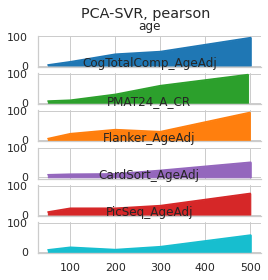

In [21]:
import numpy as np
sns.set(rc={"figure.figsize":(4, 4)})
sns.set_style("whitegrid")
# Replicability of:
feature = 'netmats_pearson'
model = "PCA_SVR"
df = pd.read_csv('res/results_' + model + '.csv')
df_null = pd.read_csv('res/results_null_' + model + '.csv')

fig, axes = plt.subplots(6, sharex=True, sharey=True)
cols = ['tab:blue', 'tab:green', 'tab:orange', 'tab:purple', 'tab:red', 'tab:cyan']
for i_target, target in enumerate(['age', 'CogTotalComp_AgeAdj', 'PMAT24_A_CR', 'Flanker_AgeAdj', 'CardSort_AgeAdj', 'PicSeq_AgeAdj']):
    tmp = df.loc[(df.target==target) & (df.connectivity==feature)]
    tmp_null = df_null.loc[(df_null.target==target) & (df_null.connectivity==feature)]

    alpha=0.05
    power = np.zeros(len(tmp.n.unique()))
    for i, n in enumerate(tmp.n.unique()):
            tmp2 = tmp[tmp.n == n]
            tmp2_null = tmp_null[tmp_null.n == n]
            r_discovery_threshold = np.quantile(tmp2_null.r_discovery_cv.dropna(), 1-alpha)

            power[i] = (tmp2['r_discovery_cv']>=r_discovery_threshold).sum() / len(tmp2['r_discovery_cv']) * 100

    sns.lineplot(x=tmp.n.unique(), y=power, color=cols[i_target], ax=axes[i_target]).set(title=target)
    #fig.xlim((50,500))
    #fig.ylim((0,100))
    axes[i_target].fill_between(tmp.n.unique(), power, color=cols[i_target])
    sns.despine()
    fig.suptitle('PCA-SVR, pearson')
    plt.savefig('fig/power_' + feature + '_' + model + '.pdf')

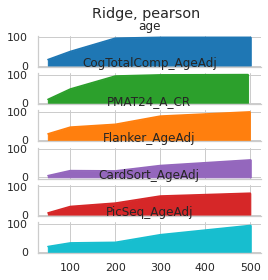

In [22]:
import numpy as np
sns.set(rc={"figure.figsize":(4, 4)})
sns.set_style("whitegrid")
# Replicability of:
feature = 'netmats_pearson'
model = "Ridge"
df = pd.read_csv('res/results_' + model + '.csv')
df_null = pd.read_csv('res/results_null_' + model + '.csv')

fig, axes = plt.subplots(6, sharex=True, sharey=True)
cols = ['tab:blue', 'tab:green', 'tab:orange', 'tab:purple', 'tab:red', 'tab:cyan']
for i_target, target in enumerate(['age', 'CogTotalComp_AgeAdj', 'PMAT24_A_CR', 'Flanker_AgeAdj', 'CardSort_AgeAdj', 'PicSeq_AgeAdj']):
    tmp = df.loc[(df.target==target) & (df.connectivity==feature)]
    tmp_null = df_null.loc[(df_null.target==target) & (df_null.connectivity==feature)]

    alpha=0.05
    power = np.zeros(len(tmp.n.unique()))
    for i, n in enumerate(tmp.n.unique()):
            tmp2 = tmp[tmp.n == n]
            tmp2_null = tmp_null[tmp_null.n == n]
            r_discovery_threshold = np.quantile(tmp2_null.r_discovery_cv.dropna(), 1-alpha)

            power[i] = (tmp2['r_discovery_cv']>=r_discovery_threshold).sum() / len(tmp2['r_discovery_cv']) * 100

    sns.lineplot(x=tmp.n.unique(), y=power, color=cols[i_target], ax=axes[i_target]).set(title=target)
    #fig.xlim((50,500))
    #fig.ylim((0,100))
    axes[i_target].fill_between(tmp.n.unique(), power, color=cols[i_target])
    sns.despine()
    fig.suptitle('Ridge, pearson')
    plt.savefig('fig/power_' + feature + '_' + model + '.pdf')

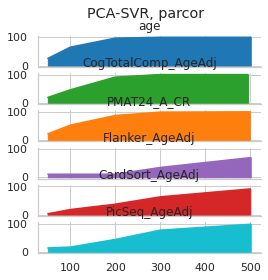

In [23]:
import numpy as np
sns.set(rc={"figure.figsize":(4, 4)})
sns.set_style("whitegrid")
# Replicability of:
feature = 'netmats_parcor'
model = "PCA_SVR"
df = pd.read_csv('res/results_' + model + '.csv')
df_null = pd.read_csv('res/results_null_' + model + '.csv')

fig, axes = plt.subplots(6, sharex=True, sharey=True)
cols = ['tab:blue', 'tab:green', 'tab:orange', 'tab:purple', 'tab:red', 'tab:cyan']
for i_target, target in enumerate(['age', 'CogTotalComp_AgeAdj', 'PMAT24_A_CR', 'Flanker_AgeAdj', 'CardSort_AgeAdj', 'PicSeq_AgeAdj']):
    tmp = df.loc[(df.target==target) & (df.connectivity==feature)]
    tmp_null = df_null.loc[(df_null.target==target) & (df_null.connectivity==feature)]

    alpha=0.05
    power = np.zeros(len(tmp.n.unique()))
    for i, n in enumerate(tmp.n.unique()):
            tmp2 = tmp[tmp.n == n]
            tmp2_null = tmp_null[tmp_null.n == n]
            r_discovery_threshold = np.quantile(tmp2_null.r_discovery_cv.dropna(), 1-alpha)

            power[i] = (tmp2['r_discovery_cv']>=r_discovery_threshold).sum() / len(tmp2['r_discovery_cv']) * 100

    sns.lineplot(x=tmp.n.unique(), y=power, color=cols[i_target], ax=axes[i_target]).set(title=target)
    axes[i_target].fill_between(tmp.n.unique(), power, color=cols[i_target])
    sns.despine()
    fig.suptitle('PCA-SVR, parcor')
    plt.savefig('fig/power_' + feature + '_' + model + '.pdf')

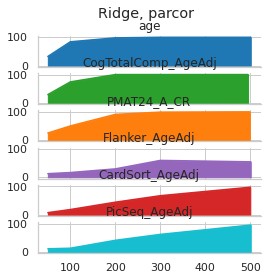

In [24]:
import numpy as np
sns.set(rc={"figure.figsize":(4, 4)})
sns.set_style("whitegrid")
# Replicability of:
feature = 'netmats_parcor'
model = "Ridge"
df = pd.read_csv('res/results_' + model + '.csv')
df_null = pd.read_csv('res/results_null_' + model + '.csv')

fig, axes = plt.subplots(6, sharex=True, sharey=True)
cols = ['tab:blue', 'tab:green', 'tab:orange', 'tab:purple', 'tab:red', 'tab:cyan']
for i_target, target in enumerate(['age', 'CogTotalComp_AgeAdj', 'PMAT24_A_CR', 'Flanker_AgeAdj', 'CardSort_AgeAdj', 'PicSeq_AgeAdj']):
    tmp = df.loc[(df.target==target) & (df.connectivity==feature)]
    tmp_null = df_null.loc[(df_null.target==target) & (df_null.connectivity==feature)]

    alpha=0.05
    power = np.zeros(len(tmp.n.unique()))
    for i, n in enumerate(tmp.n.unique()):
            tmp2 = tmp[tmp.n == n]
            tmp2_null = tmp_null[tmp_null.n == n]
            r_discovery_threshold = np.quantile(tmp2_null.r_discovery_cv.dropna(), 1-alpha)

            power[i] = (tmp2['r_discovery_cv']>=r_discovery_threshold).sum() / len(tmp2['r_discovery_cv']) * 100

    sns.lineplot(x=tmp.n.unique(), y=power, color=cols[i_target], ax=axes[i_target]).set(title=target)
    #fig.xlim((50,500))
    #fig.ylim((0,100))
    axes[i_target].fill_between(tmp.n.unique(), power, color=cols[i_target])
    sns.despine()
    fig.suptitle('Ridge, parcor')
    plt.savefig('fig/power_' + feature + '_' + model + '.pdf')

# Learning Curves

In [25]:
def plot_learning_curve(target, feature, df, filetag=None):
    sns.set(rc={"figure.figsize":(3, 2)})
    sns.set_style("white")
    tmp = df.loc[(df.target==target) & (df.connectivity==feature)]

    sns.lineplot(x='n', y='r_discovery_cv', data=tmp, ci="sd")
    sns.lineplot(x='n', y='r_discovery_overfit', data=tmp, ci="sd")
    sns.lineplot(x='n', y='r_replication', data=tmp, ci="sd")
    plt.ylim((-0.2, 1.01))
    sns.despine()
    if filetag:
        plt.savefig('fig/learning_curve_' + target + '_' + feature + '_' + filetag + '.pdf')

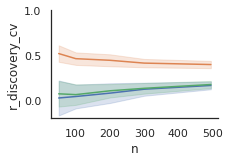

In [26]:
df = pd.read_csv('res/results_PCA_SVR.csv')
plot_learning_curve(target='CogTotalComp_AgeAdj', feature='netmats_pearson', df=df, filetag='pca-svr')

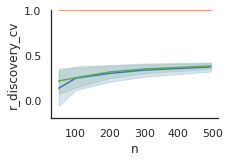

In [27]:
df = pd.read_csv('res/results_Ridge.csv')
plot_learning_curve(target='CogTotalComp_AgeAdj', feature='netmats_pearson', df=df, filetag='ridge')

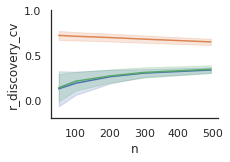

In [28]:
df = pd.read_csv('res/results_PCA_SVR.csv')
plot_learning_curve(target='CogTotalComp_AgeAdj', feature='netmats_parcor', df=df, filetag='pca-svr')

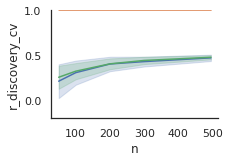

In [29]:
df = pd.read_csv('res/results_Ridge.csv')
plot_learning_curve(target='CogTotalComp_AgeAdj', feature='netmats_parcor', df=df, filetag='ridge')

# Composite figures to summarize improvement with Ridge and partial correlation

### Power: Pearson + PCA-SVR

In [107]:
sample_size_needed = []
variable = []
method = []

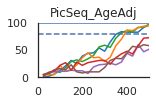

In [108]:
import numpy as np
sns.set(rc={"figure.figsize":(2, 1)})
sns.set_style("white")
# Replicability of:
feature = 'netmats_pearson'
model = "PCA_SVR"
df = pd.read_csv('res/hires_results_' + model + '.csv')
df_null = pd.read_csv('res/hires_results_null_' + model + '.csv')

cols = ['tab:blue', 'tab:green', 'tab:orange', 'tab:purple', 'tab:red', 'tab:brown']
for i_target, target in enumerate(['age', 'CogTotalComp_AgeAdj', 'PMAT24_A_CR', 'Flanker_AgeAdj', 'CardSort_AgeAdj', 'PicSeq_AgeAdj']):
    tmp = df.loc[(df.target==target) & (df.connectivity==feature)]
    tmp_null = df_null.loc[(df_null.target==target) & (df_null.connectivity==feature)]

    alpha=0.05
    power = np.zeros(len(tmp.n.unique()))
    n_req = 600
    for i, n in enumerate(tmp.n.unique()):
            tmp2 = tmp[tmp.n == n]
            tmp2_null = tmp_null[tmp_null.n == n]
            r_discovery_threshold = np.quantile(tmp2_null.r_discovery_cv.dropna(), 1-alpha)

            power[i] = (tmp2['r_discovery_cv']>=r_discovery_threshold).sum() / len(tmp2['r_discovery_cv']) * 100
            if power[i] >= 80 and n_req == 600:
                n_req = n

    sample_size_needed.append(n_req)
    variable.append(target)
    method.append(feature + '_' + model)

    sns.lineplot(x=tmp.n.unique(), y=power, color=cols[i_target]).set(title=target)
sns.despine()
plt.axhline(80, linestyle = 'dashed')
plt.axhline(100)
plt.xlim(0,500)
plt.ylim(0,100)
plt.savefig('fig/power_all_' + feature + '_' + model + '.pdf')



### Power: Partial corr + Ridge

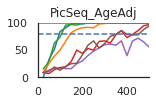

In [109]:
import numpy as np
sns.set(rc={"figure.figsize":(2, 1)})
sns.set_style("white")
# Replicability of:
feature = 'netmats_parcor'
model = "Ridge"
df = pd.read_csv('res/hires_results_' + model + '.csv')
df_null = pd.read_csv('res/hires_results_null_' + model + '.csv')

cols = ['tab:blue', 'tab:green', 'tab:orange', 'tab:purple', 'tab:red', 'tab:brown']
for i_target, target in enumerate(['age', 'CogTotalComp_AgeAdj', 'PMAT24_A_CR', 'Flanker_AgeAdj', 'CardSort_AgeAdj', 'PicSeq_AgeAdj']):
    tmp = df.loc[(df.target==target) & (df.connectivity==feature)]
    tmp_null = df_null.loc[(df_null.target==target) & (df_null.connectivity==feature)]

    alpha=0.05
    power = np.zeros(len(tmp.n.unique()))
    n_req = 600
    for i, n in enumerate(tmp.n.unique()):
            tmp2 = tmp[tmp.n == n]
            tmp2_null = tmp_null[tmp_null.n == n]
            r_discovery_threshold = np.quantile(tmp2_null.r_discovery_cv.dropna(), 1-alpha)

            power[i] = (tmp2['r_discovery_cv']>=r_discovery_threshold).sum() / len(tmp2['r_discovery_cv']) * 100
            if power[i] >= 80 and n_req == 600:
                n_req = n

    sample_size_needed.append(n_req)
    variable.append(target)
    method.append(feature + '_' + model)

    sns.lineplot(x=tmp.n.unique(), y=power, color=cols[i_target]).set(title=target)
sns.despine()
plt.axhline(80, linestyle = 'dashed')
plt.axhline(100)
plt.xlim(0,500)
plt.ylim(0,100)
plt.savefig('fig/power_all_' + feature + '_' + model + '.pdf')

,sample size needed,target,method
0,375,age,netmats_pearson_PCA_SVR
1,375,CogTotalComp_AgeAdj,netmats_pearson_PCA_SVR
2,400,PMAT24_A_CR,netmats_pearson_PCA_SVR
3,600,Flanker_AgeAdj,netmats_pearson_PCA_SVR
4,600,CardSort_AgeAdj,netmats_pearson_PCA_SVR
5,600,PicSeq_AgeAdj,netmats_pearson_PCA_SVR
6,100,age,netmats_parcor_Ridge
7,125,CogTotalComp_AgeAdj,netmats_parcor_Ridge
8,150,PMAT24_A_CR,netmats_parcor_Ridge
9,600,Flanker_AgeAdj,netmats_parcor_Ridge


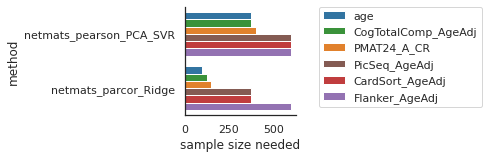

In [110]:
sns.set(rc={"figure.figsize":(2, 2)})
sns.set_style("white")

bar_df = pd.DataFrame(
    {
        'sample size needed': sample_size_needed,
        'target': variable,
        'method' : method
    }
)

palette = {
    'age' : 'tab:blue',
    'CogTotalComp_AgeAdj' : 'tab:green',
    'PMAT24_A_CR' : 'tab:orange',
    'Flanker_AgeAdj' : 'tab:purple',
    'CardSort_AgeAdj' : 'tab:red',
    'PicSeq_AgeAdj' : 'tab:brown'
}

sns.barplot(x='sample size needed', y='method', hue='target', data=bar_df, palette=palette, ci=None,
            hue_order = ['age', 'CogTotalComp_AgeAdj', 'PMAT24_A_CR', 'PicSeq_AgeAdj', 'CardSort_AgeAdj', 'Flanker_AgeAdj'])
plt.legend(bbox_to_anchor=(1.2, 1), loc=2, borderaxespad=0.)
sns.despine()
plt.savefig('fig/power_bar_all.pdf')
bar_df

### Replication: Pearson + PCA-SVR

In [111]:
sample_size_needed = []
variable = []
method = []

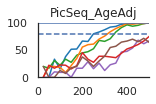

In [112]:
import numpy as np
sns.set(rc={"figure.figsize":(2, 1)})
sns.set_style("white")
# Replicability of:
feature = 'netmats_pearson'
model = "PCA_SVR"
df = pd.read_csv('res/hires_results_' + model + '.csv')
df_null = pd.read_csv('res/hires_results_null_' + model + '.csv')

cols = ['tab:blue', 'tab:green', 'tab:orange', 'tab:purple', 'tab:red', 'tab:brown']
for i_target, target in enumerate(['age', 'CogTotalComp_AgeAdj', 'PMAT24_A_CR', 'Flanker_AgeAdj', 'CardSort_AgeAdj', 'PicSeq_AgeAdj']):
    tmp = df.loc[(df.target==target) & (df.connectivity==feature)]
    tmp_null = df_null.loc[(df_null.target==target) & (df_null.connectivity==feature)]

    alpha=0.05
    replication_prob = np.zeros(len(tmp.n.unique()))
    n_req = 600
    for i, n in enumerate(tmp.n.unique()):
            tmp2 = tmp[tmp.n == n]
            tmp2_null = tmp_null[tmp_null.n == n]
            r_discovery_threshold = np.quantile(tmp2_null.r_discovery_cv.dropna(), 1-alpha)

            if (tmp2['r_discovery_cv']>=r_discovery_threshold).sum() == 0:
                replication_prob[i] = np.nan
            else:
                 #      #(significant replications among significant discoveries)     / # significant replications
                replication_prob[i] = (tmp2.loc[tmp2['r_discovery_cv']>=r_discovery_threshold,'p_replication']<alpha).sum() / (tmp2['r_discovery_cv']>=r_discovery_threshold).sum() * 100

            if replication_prob[i] >= 80 and n_req == 600:
                n_req = n

    sample_size_needed.append(n_req)
    variable.append(target)
    method.append(feature + '_' + model)

    sample_size_needed.append(n_req)
    variable.append(target)
    method.append(feature + '_' + model)

    sns.lineplot(x=tmp.n.unique(), y=replication_prob, color=cols[i_target]).set(title=target)
sns.despine()
plt.axhline(80, linestyle = 'dashed')
plt.axhline(100)
plt.xlim(0,500)
plt.ylim(0,100)
plt.savefig('fig/replication_all_' + feature + '_' + model + '.pdf')

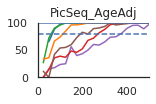

In [113]:
import numpy as np
sns.set(rc={"figure.figsize":(2, 1)})
sns.set_style("white")
# Replicability of:
feature = 'netmats_parcor'
model = "Ridge"
df = pd.read_csv('res/hires_results_' + model + '.csv')
df_null = pd.read_csv('res/hires_results_null_' + model + '.csv')

cols = ['tab:blue', 'tab:green', 'tab:orange', 'tab:purple', 'tab:red', 'tab:brown']
for i_target, target in enumerate(['age', 'CogTotalComp_AgeAdj', 'PMAT24_A_CR', 'Flanker_AgeAdj', 'CardSort_AgeAdj', 'PicSeq_AgeAdj']):
    tmp = df.loc[(df.target==target) & (df.connectivity==feature)]
    tmp_null = df_null.loc[(df_null.target==target) & (df_null.connectivity==feature)]

    alpha=0.05
    replication_prob = np.zeros(len(tmp.n.unique()))
    n_req = 600
    for i, n in enumerate(tmp.n.unique()):
            tmp2 = tmp[tmp.n == n]
            tmp2_null = tmp_null[tmp_null.n == n]
            r_discovery_threshold = np.quantile(tmp2_null.r_discovery_cv.dropna(), 1-alpha)

            if (tmp2['r_discovery_cv']>=r_discovery_threshold).sum() == 0:
                replication_prob[i] = np.nan
            else:
                 #      #(significant replications among significant discoveries)     / # significant replications
                replication_prob[i] = (tmp2.loc[tmp2['r_discovery_cv']>=r_discovery_threshold,'p_replication']<alpha).sum() / (tmp2['r_discovery_cv']>=r_discovery_threshold).sum() * 100

            if replication_prob[i] >= 80 and n_req == 600:
                n_req = n

    sample_size_needed.append(n_req)
    variable.append(target)
    method.append(feature + '_' + model)

    sns.lineplot(x=tmp.n.unique(), y=replication_prob, color=cols[i_target]).set(title=target)
sns.despine()
plt.axhline(80, linestyle = 'dashed')
plt.axhline(100)
plt.xlim(0,500)
plt.ylim(0,100)
plt.savefig('fig/replication_all_' + feature + '_' + model + '.pdf')

,sample size needed,target,method
0,250,age,netmats_pearson_PCA_SVR
1,250,age,netmats_pearson_PCA_SVR
2,350,CogTotalComp_AgeAdj,netmats_pearson_PCA_SVR
3,350,CogTotalComp_AgeAdj,netmats_pearson_PCA_SVR
4,325,PMAT24_A_CR,netmats_pearson_PCA_SVR
5,325,PMAT24_A_CR,netmats_pearson_PCA_SVR
6,600,Flanker_AgeAdj,netmats_pearson_PCA_SVR
7,600,Flanker_AgeAdj,netmats_pearson_PCA_SVR
8,600,CardSort_AgeAdj,netmats_pearson_PCA_SVR
9,600,CardSort_AgeAdj,netmats_pearson_PCA_SVR


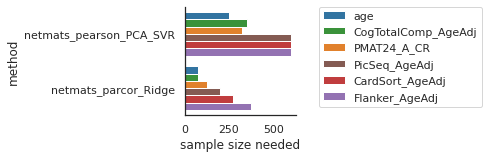

In [114]:
sns.set(rc={"figure.figsize":(2, 2)})
sns.set_style("white")

bar_df = pd.DataFrame(
    {
        'sample size needed': sample_size_needed,
        'target': variable,
        'method' : method
    }
)

palette = {
    'age' : 'tab:blue',
    'CogTotalComp_AgeAdj' : 'tab:green',
    'PMAT24_A_CR' : 'tab:orange',
    'Flanker_AgeAdj' : 'tab:purple',
    'CardSort_AgeAdj' : 'tab:red',
    'PicSeq_AgeAdj' : 'tab:brown'
}

sns.barplot(x='sample size needed', y='method', hue='target', data=bar_df, palette=palette, ci=None,
            hue_order = ['age', 'CogTotalComp_AgeAdj', 'PMAT24_A_CR', 'PicSeq_AgeAdj', 'CardSort_AgeAdj', 'Flanker_AgeAdj'])
plt.legend(bbox_to_anchor=(1.2, 1), loc=2, borderaxespad=0.)
sns.despine()
plt.savefig('fig/replication_bar_all.pdf')
bar_df